## Business Problem
Historically, gold had been used as a form of currency in various parts of the world including the USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. Recently, emerging world economies, such as China, Russia, and India have been big buyers of gold, whereas the USA, SoUSA, South Africa, and Australia are among the big seller of gold.

Fractional change in gold price may result in huge profit or loss for investors as well as government banks.
Forecasting rise and fall in the daily gold rates can help investors to decide when to buy (or sell) the commodity. But Gold prices are dependent on many factors such as prices of other precious metals, prices of crude oil, stock exchange performance, Bonds prices, currency exchange rates, etc.


#### Business Objectives and Constraints
* To accurately predict the future adjusted closing price of Gold ETF (Exchang Traded Funds) across a given period of time in the future.
* The model should not take too long to return prediction (Latency concerns)
* To Maximize the Coefficient of determination (R2) as much as posible (the closer it is to 1 the better)
* To minimize the Root Mean Squared Error (RMSE) as much as posible (the closer it is to zero the better) 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Type of Machine Learning Problem
It is a Regression problem as the target variable (adjusted closing price) is a **continuous** value.

####  Performance Metric

- R^2 score (Coefficient of determination)
- RMSE (root mean squared error)

### Data Overview
- Data Source: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset <br><br>
- Data for this study is collected from November 18th 2011 to January 1st 2019 from various sources.<br><br>
- The dataset has 1718 rows in total and 80 columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered.<br><br>
- The historical data of Gold ETF fetched from Yahoo finance has 7 columns, Date, Open, High, Low, Close, Adjusted Close, and Volume, the difference between Adjusted Close and Close is that the closing price of a stock is the price of that stock at the close of the trading day. Whereas the adjusted closing price takes into account factors such as dividends, stock splits, and new stock offerings to determine a value. So, Adjusted Close is the outcome variable which is the value you have to predict.



## Loading Data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/SQL WORK/FINAL_USO.csv") #change the file path as applicable to you
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800


## Data Cleaning

In [4]:
data.shape

(1718, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

Features

Gold ETF :- Date, Open, High, Low, Close and Volume

S&P 500 Index :- 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume'

Dow Jones Index :- 'DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume'

Eldorado Gold Corporation (EGO) :- 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume'

EURO - USD Exchange Rate :- 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend'

Brent Crude Oil Futures :- 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'

Crude Oil WTI USD :- 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend'
Silver Futures :- 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend'

US Bond Rate (10 years) :- 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend'

Platinum Price :- 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend'

Palladium Price :- 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend'

Rhodium Prices :- 'RHO_PRICE'

US Dollar Index : 'USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend'

Gold Miners ETF :- 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume'

Oil ETF USO :- 'USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume

Target Variable

Gold ETF :- Adjusted Close

In [6]:
#correcting date data type
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
# Set the date column as the index of your DataFrame
data = data.set_index('Date')

In [14]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [15]:
#Check Missing Values
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

check_missing(data)

,Total,Percent
Open,0,0.0
High,0,0.0
PLD_High,0,0.0
PLD_Open,0,0.0
PLD_Price,0,0.0
PLT_Trend,0,0.0
PLT_Low,0,0.0
PLT_High,0,0.0
PLT_Open,0,0.0
PLT_Price,0,0.0


As shown above, No missing data in the dataset. Let's move on to exploratory data analysis

## Exploratory Data Analysis

In [10]:
#Checking for correlation with target variable
data_corr = data.corr()['Adj Close'].sort_values(ascending = False)
data_corr

Close         1.000000
Adj Close     1.000000
High          0.999535
Low           0.999532
Open          0.998976
                ...   
SP_high      -0.684904
USDI_High    -0.720023
USDI_Open    -0.720140
USDI_Price   -0.721569
USDI_Low     -0.722078
Name: Adj Close, Length: 80, dtype: float64

In [11]:
#checking for positive correlation
pos_corr = data_corr[data_corr > 0]
pos_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

In [12]:
#checking for negative correlation
neg_corr = data_corr[data_corr < 0]
neg_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

During feature engineering stage, to achieve good result, it is advised to use high correlated values to the features selected to train the model. for example, a threshold value of 0.5 can be set for positive correlated features while -0.4 can be used for negative correlated features. These values I picked is just based on my intuition look at the distribution of the correlation values. During re-evaluation to get better models, this value can be changed aand resulting model accuracies can be compared against each other to select the best.

##LET'S LOOK AT VISUALIZATIONS THAT CAN BE GENERATED FROM THE DATASET

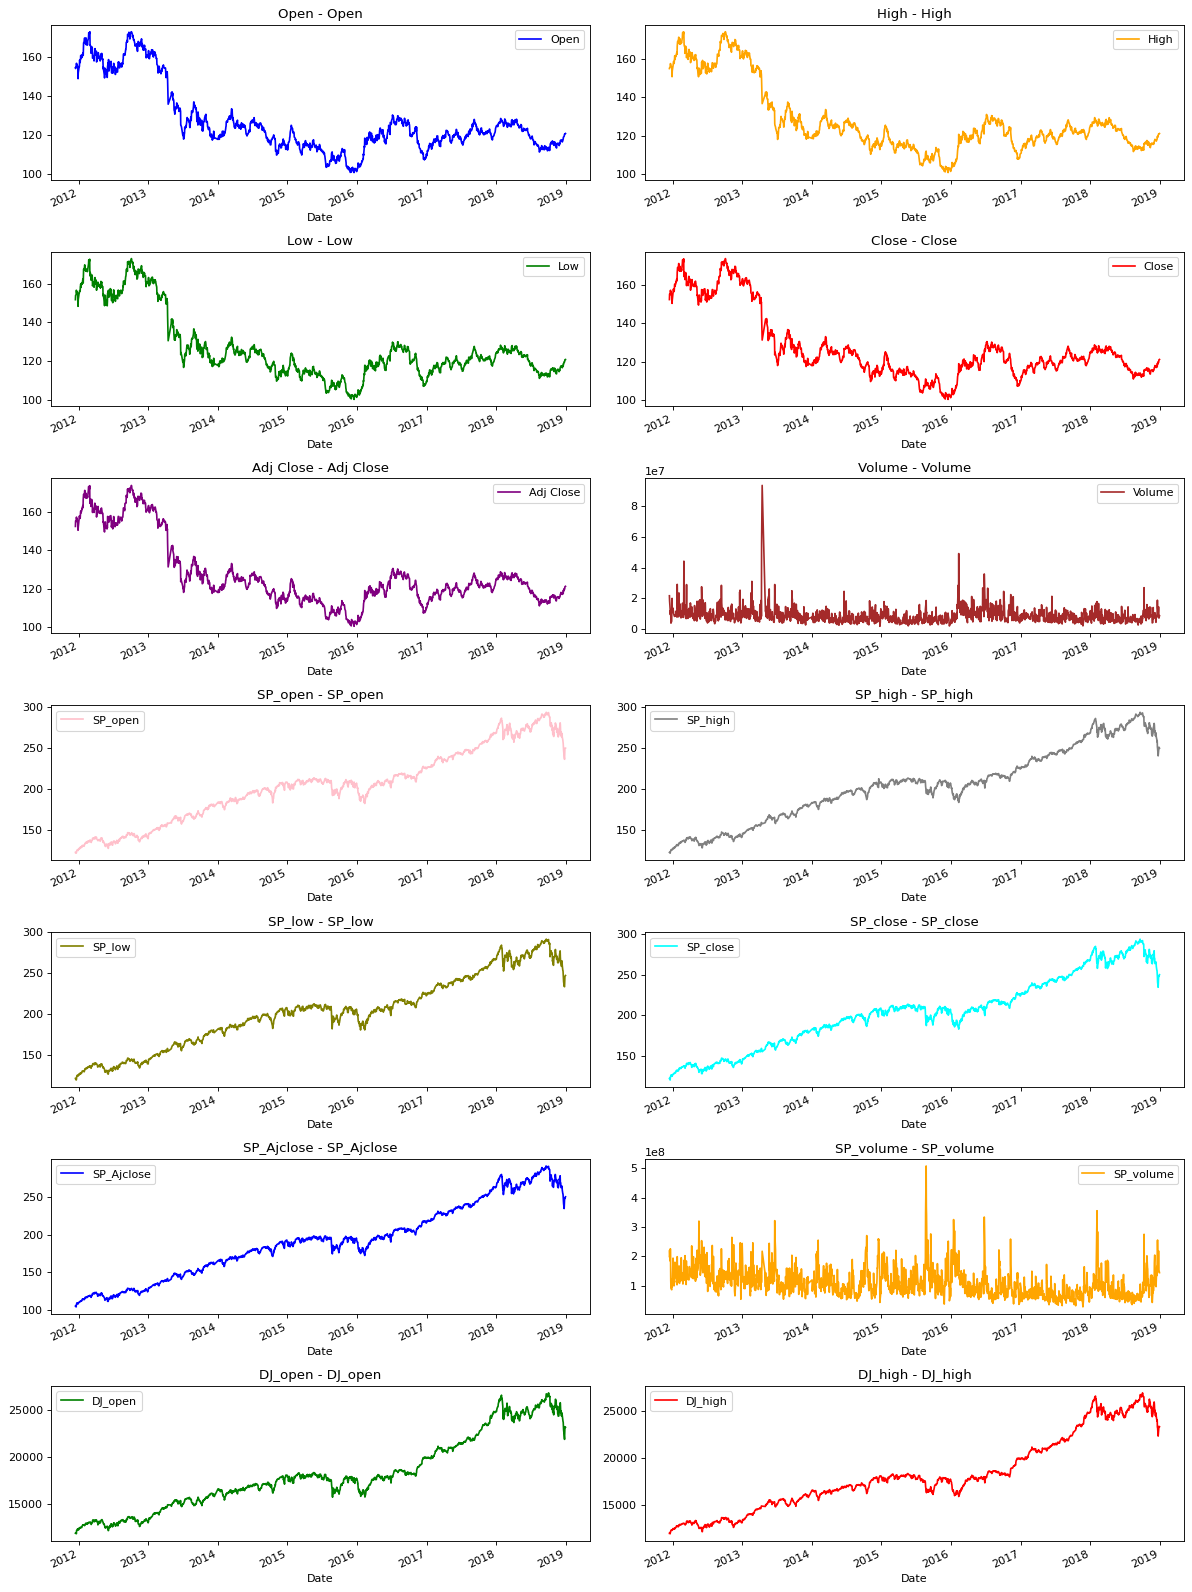

In [ ]:
#FOR SP AND DJ
import matplotlib.pyplot as plt

titles = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 
          'SP_Ajclose','SP_volume','DJ_open', 'DJ_high' ]
feature_keys = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close',
                'SP_Ajclose', 'SP_volume','DJ_open', 'DJ_high']

colors = [ "blue","orange","green","red","purple","brown","pink","gray","olive", "cyan"]

date_time_key = "Date"

def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(data)

In [ ]:
titles = [column for column in data.columns]
feature_keys = [column for column in data.columns]

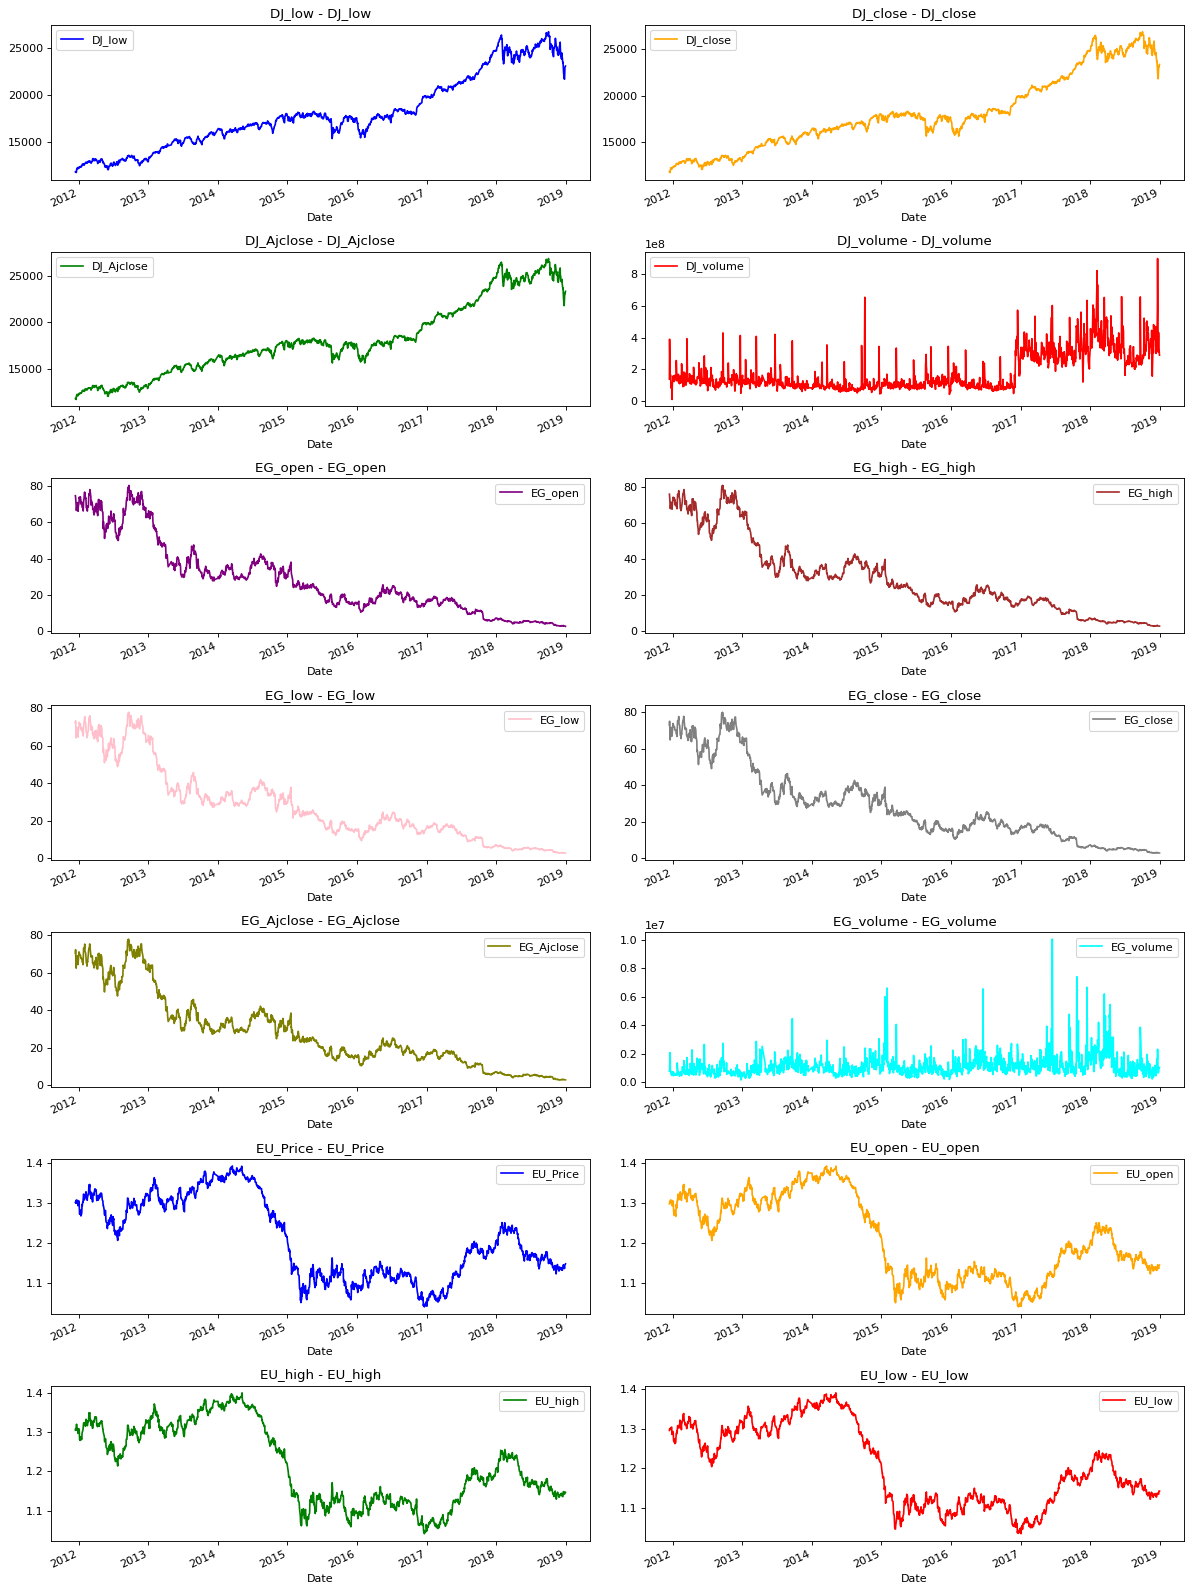

In [ ]:
titles = ['DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low']
feature_keys = ['DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low']
show_raw_visualization(data)

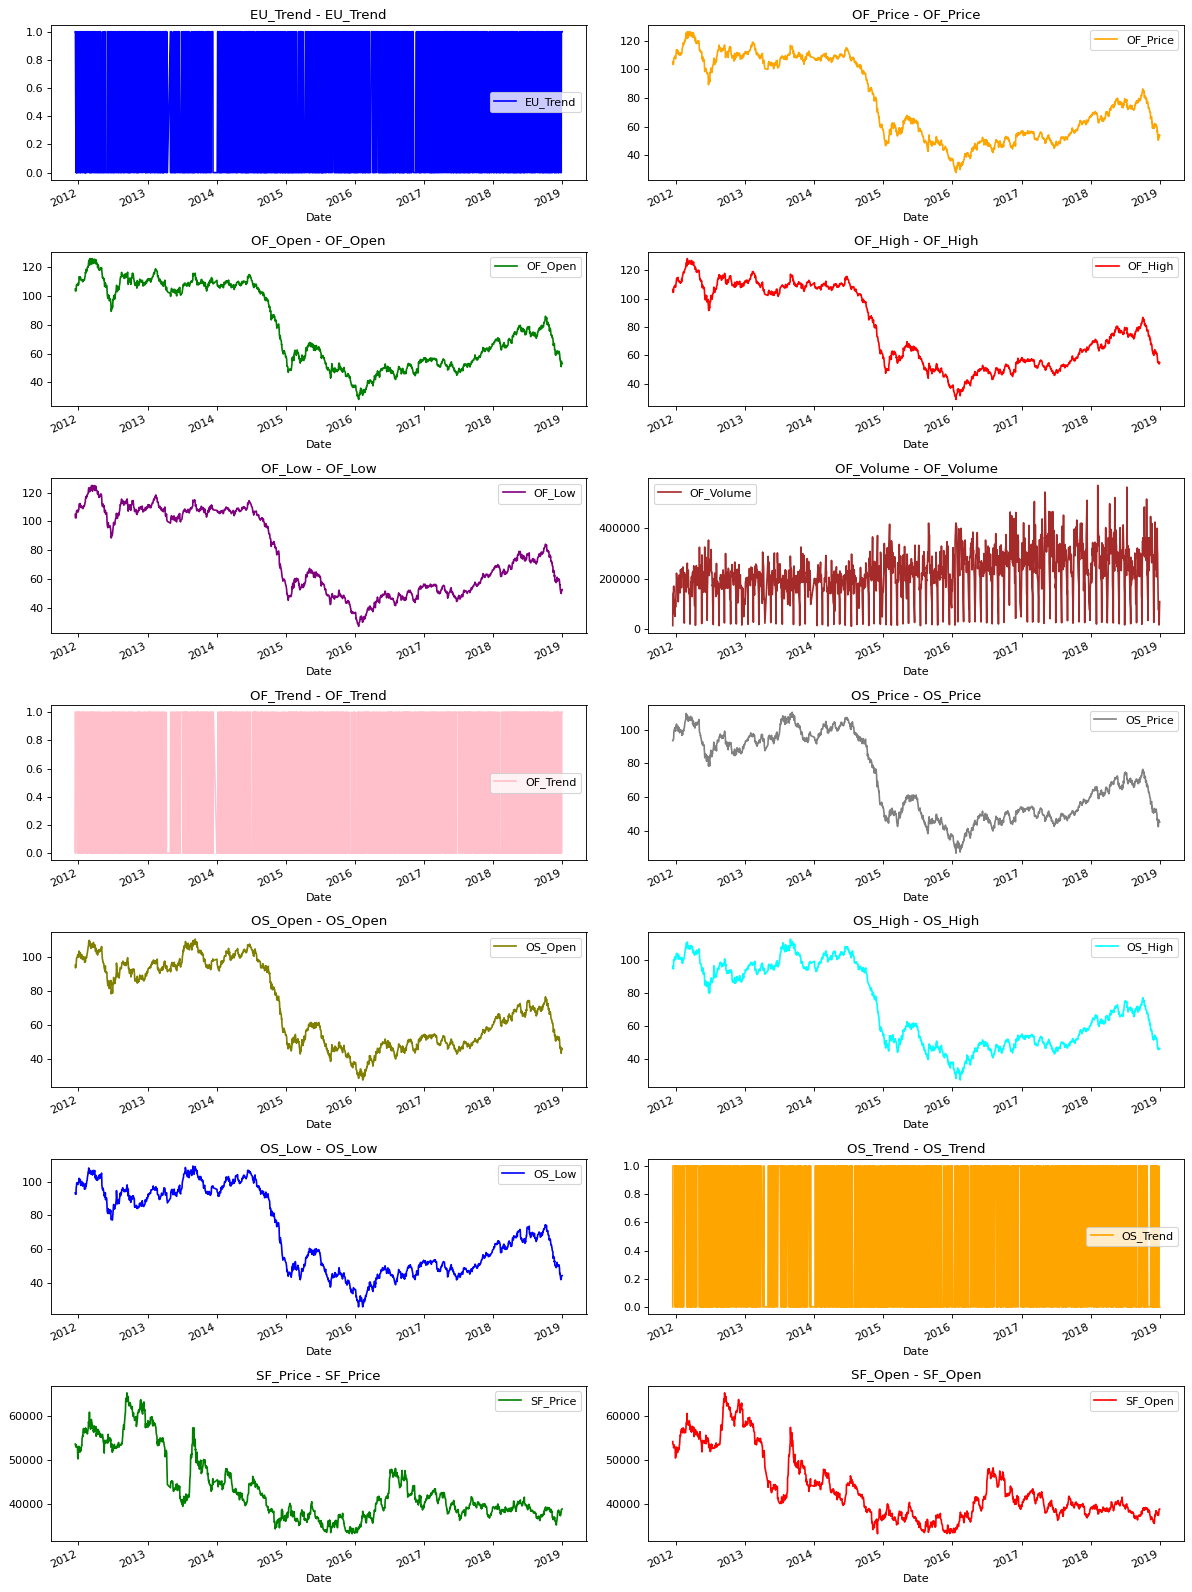

In [ ]:
titles = ['EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open']
feature_keys = ['EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open']
show_raw_visualization(data)

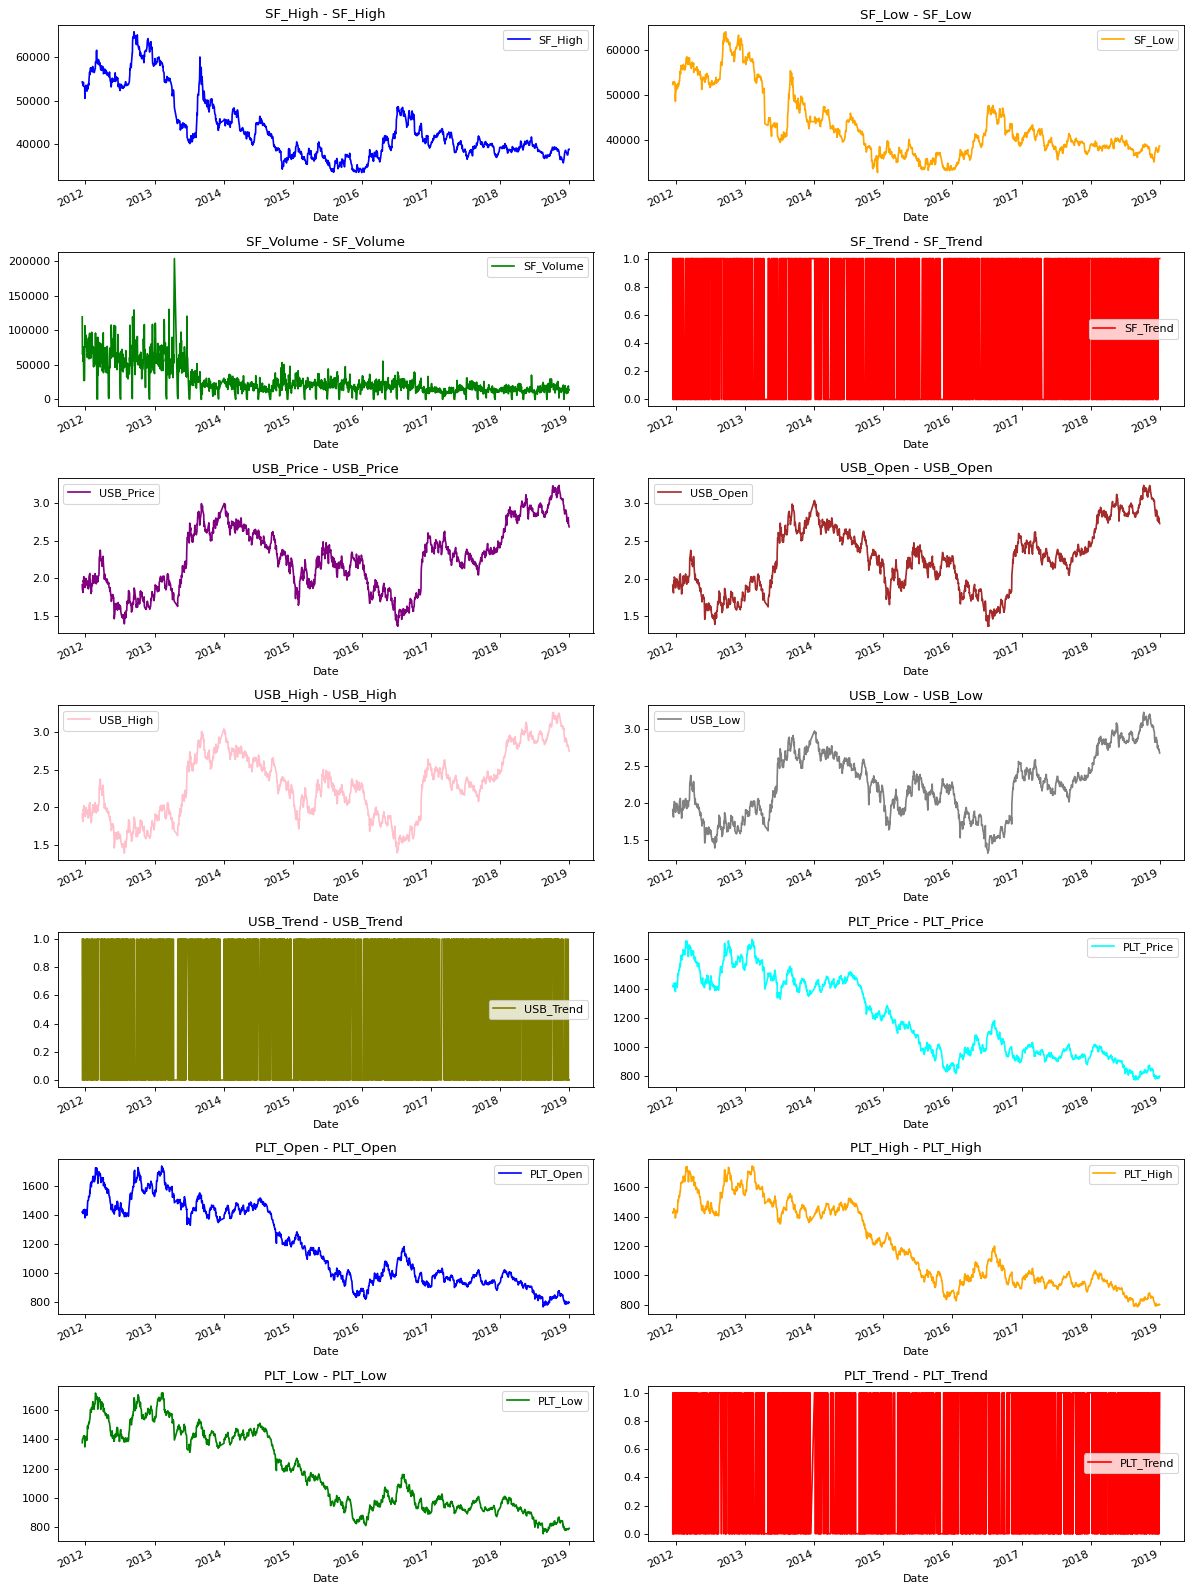

In [ ]:

titles = ['SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend']
feature_keys = ['SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend']
show_raw_visualization(data)

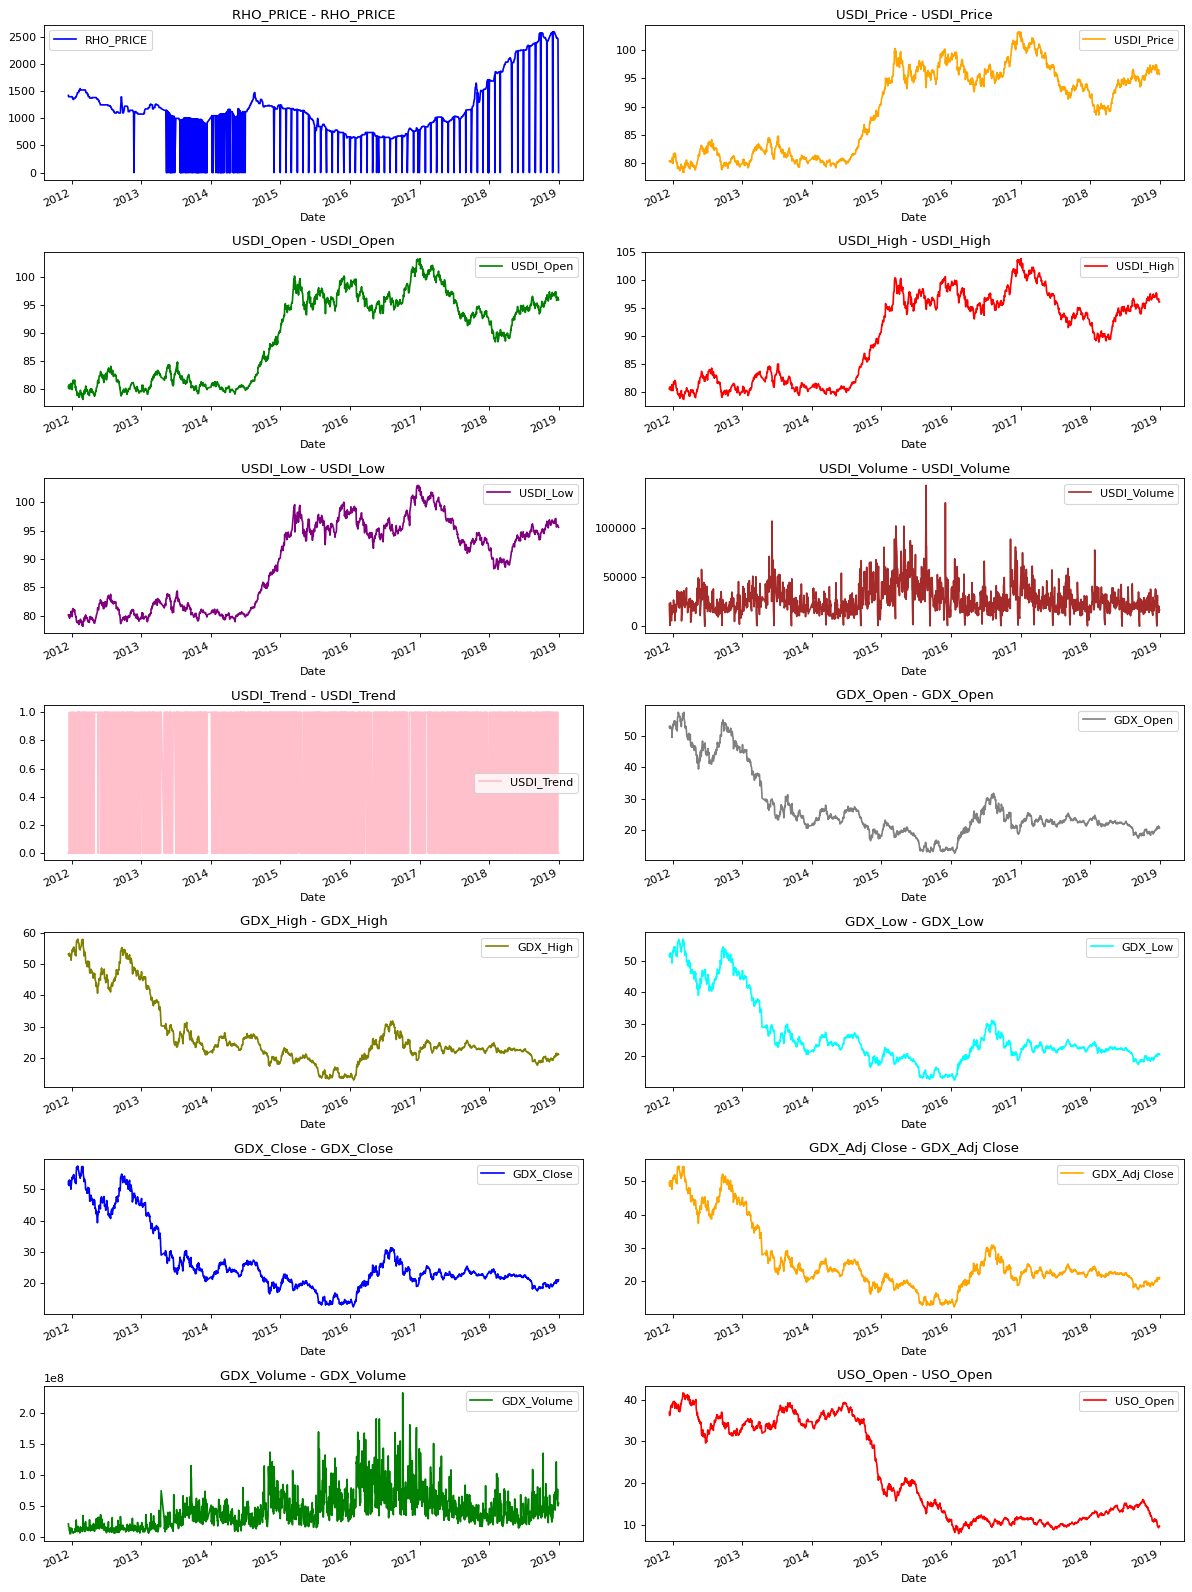

In [ ]:
titles = ['RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       ]
feature_keys = ['RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       ]
show_raw_visualization(data)

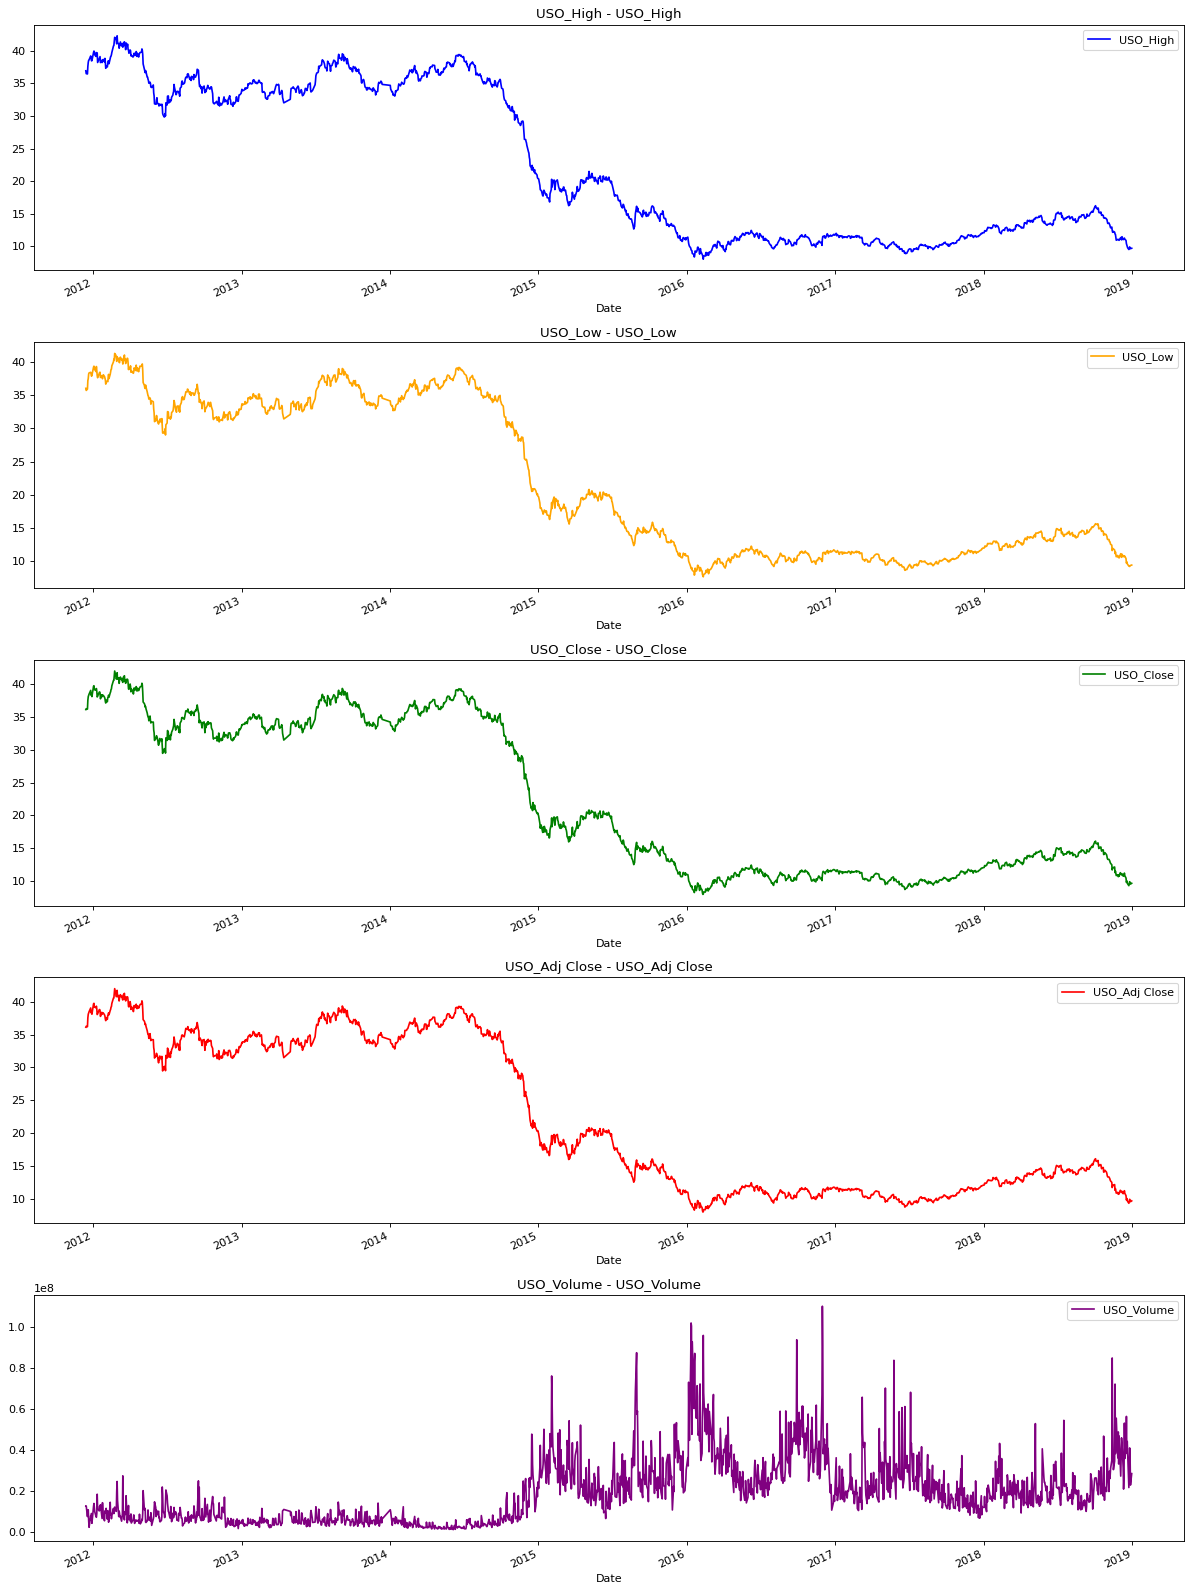

In [ ]:

titles = ['USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']
feature_keys = ['USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']

def show_raw_visualization_small(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=5, ncols=1, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()
show_raw_visualization_small(data)

In [ ]:
titles = [column for column in data.columns]
titles

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'SP_open',
 'SP_high',
 'SP_low',
 'SP_close',
 'SP_Ajclose',
 'SP_volume',
 'DJ_open',
 'DJ_high',
 'DJ_low',
 'DJ_close',
 'DJ_Ajclose',
 'DJ_volume',
 'EG_open',
 'EG_high',
 'EG_low',
 'EG_close',
 'EG_Ajclose',
 'EG_volume',
 'EU_Price',
 'EU_open',
 'EU_high',
 'EU_low',
 'EU_Trend',
 'OF_Price',
 'OF_Open',
 'OF_High',
 'OF_Low',
 'OF_Volume',
 'OF_Trend',
 'OS_Price',
 'OS_Open',
 'OS_High',
 'OS_Low',
 'OS_Trend',
 'SF_Price',
 'SF_Open',
 'SF_High',
 'SF_Low',
 'SF_Volume',
 'SF_Trend',
 'USB_Price',
 'USB_Open',
 'USB_High',
 'USB_Low',
 'USB_Trend',
 'PLT_Price',
 'PLT_Open',
 'PLT_High',
 'PLT_Low',
 'PLT_Trend',
 'PLD_Price',
 'PLD_Open',
 'PLD_High',
 'PLD_Low',
 'PLD_Trend',
 'RHO_PRICE',
 'USDI_Price',
 'USDI_Open',
 'USDI_High',
 'USDI_Low',
 'USDI_Volume',
 'USDI_Trend',
 'GDX_Open',
 'GDX_High',
 'GDX_Low',
 'GDX_Close',
 'GDX_Adj Close',
 'GDX_Volume',
 'USO_Open',
 'USO_High',
 'USO_Low',
 'USO

metal= [ 'Adj Close',
 'SP_Ajclose',
 'DJ_Ajclose',
 'EG_Ajclose',
 'EU_Price',
 'OF_Price',
 'OS_Price',
 'SF_Price',
 'USB_Price',
 'USB_Trend',
 'PLT_Price',
 'PLD_Price',
 'RHO_PRICE',
 'USDI_Price',
 'GDX_Adj Close',
 'USO_Adj Close']

Mean= 127.31948200349244
Standard Deviation= 17.53626908041542
Kurtosis= 0.24721770893983575


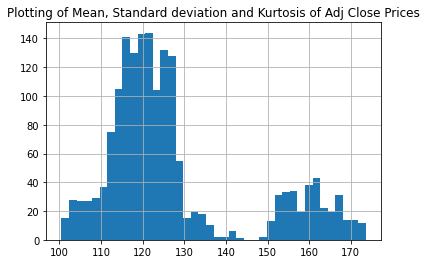

Mean= 192.20457038242142
Standard Deviation= 48.51416123015281
Kurtosis= -0.8656737936161205


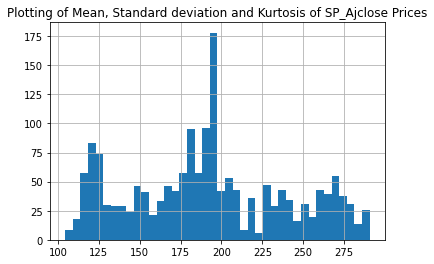

Mean= 18164.11904321886
Standard Deviation= 3884.49588726716
Kurtosis= -0.6560944036220193


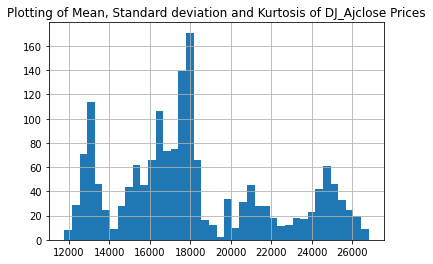

Mean= 27.78395800814901
Standard Deviation= 19.721857152775996
Kurtosis= -0.22311709377519762


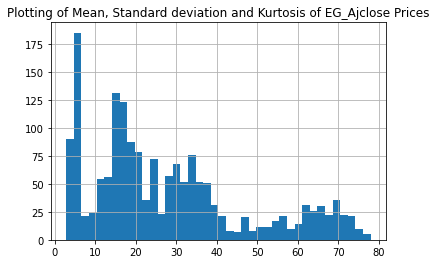

Mean= 1.2084944703143192
Standard Deviation= 0.10053478875122451
Kurtosis= -1.3480519470685717


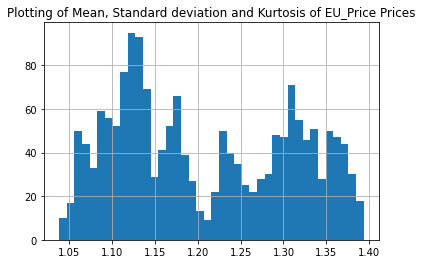

Mean= 77.50452270081489
Standard Deviation= 27.400703417829533
Kurtosis= -1.5307715604148182


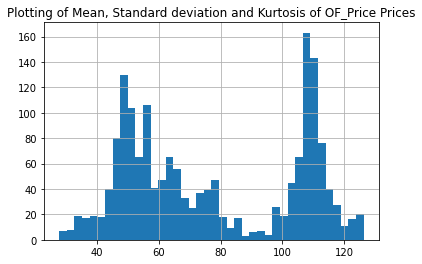

Mean= 70.15309662398137
Standard Deviation= 23.471513729241426
Kurtosis= -1.4936063665880066


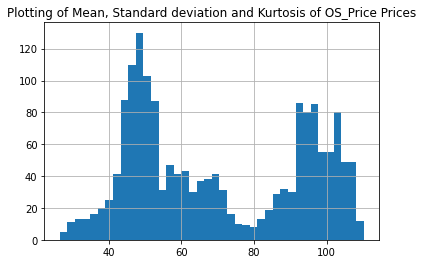

Mean= 43284.478463329455
Standard Deviation= 7530.70401181923
Kurtosis= 0.037056883727791146


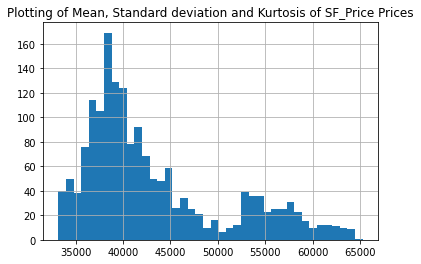

Mean= 2.262769499417928
Standard Deviation= 0.43346859129576576
Kurtosis= -0.8858648948896746


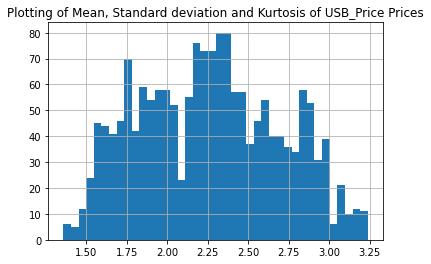

Mean= 1183.9154249126893
Standard Deviation= 273.84209529303314
Kurtosis= -1.3708130346127505


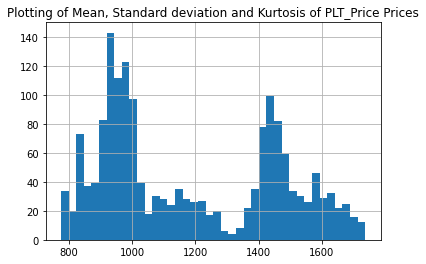

Mean= 766.8051222351571
Standard Deviation= 148.30718862306315
Kurtosis= -0.08022423368535714


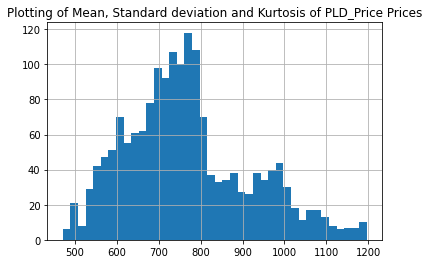

Mean= 1130.442374854482
Standard Deviation= 570.0128812546436
Kurtosis= 0.7609271234195689


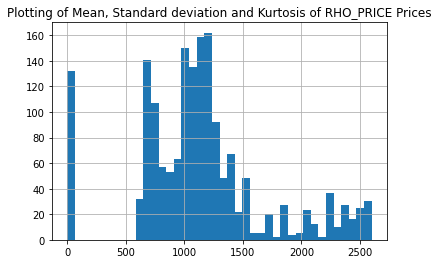

Mean= 89.8094266589057
Standard Deviation= 7.516114961023049
Kurtosis= -1.5594241712224373


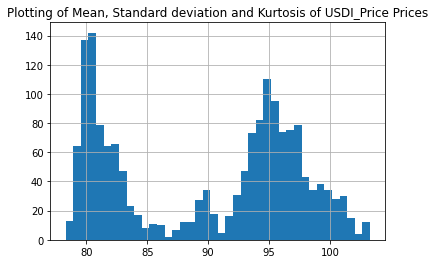

Mean= 25.924623530849825
Standard Deviation= 9.886569644014179
Kurtosis= 0.76015919453274


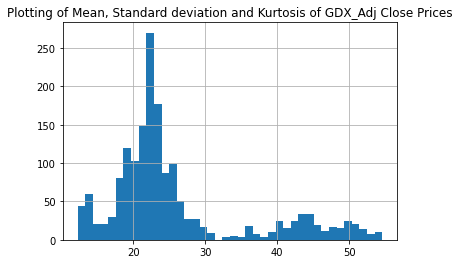

Mean= 22.10905120023283
Standard Deviation= 11.432786706321563
Kurtosis= -1.6809189878878932


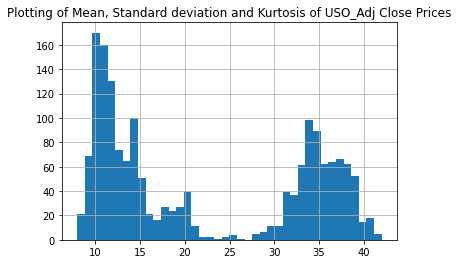

In [24]:
# computing mean,standard deviation and kurtosis of Gold ETF daily return
metal= [ 'Adj Close', 'SP_Ajclose', 'DJ_Ajclose', 'EG_Ajclose', 'EU_Price', 'OF_Price', 'OS_Price', 'SF_Price', 'USB_Price', 'PLT_Price', 'PLD_Price', 'RHO_PRICE', 'USDI_Price', 'GDX_Adj Close', 'USO_Adj Close']
for i in metal:
  mean=data[i].mean()
  # computing standard deviation of Gold stock
  std=data[i].std()
  kurt=data[i].kurtosis()
  print('Mean=',mean)
  print('Standard Deviation=',std)
  print('Kurtosis=',kurt)
  #Plotting Histogram
  data[i].hist(bins=40)
  plt.title(f"Plotting of Mean, Standard deviation and Kurtosis of {i} Prices")
  plt.show()

These visualizations can help us with knowing the distribution type of the features and what necessary action to take, e.g standardization or normalization, before modelling with the data

## Data Normalization

## Feature Engineering

## Modelling

## Model Evaluation

## Comparison (Tabular form)